                            
# Projet2 --  Machine Learning 

# Chaima HAJ TAHER


#  Programmation de K-Means 

In [1]:
#importer une partie de la bibliothèque Sklearn
from sklearn import datasets, metrics
import numpy as np
%matplotlib inline     
import pandas as pd #bibliothèque pandas
import matplotlib.pyplot as plt        #permet d'importer 'pyplot' et de remplacer son nom par 'plt'


# Pandas 
Pandas est une bibliothèque open source puissante, rapide et flexible utilisée pour l’analyse de données et les manipulations de cadres de données/ensembles de données. Les pandas peuvent être utilisés pour lire et écrire des données dans un ensemble de données de différents formats tels que CSV ( type de fichier texte brut qui utilise une structure spécifique pour organiser les données tabulaires par des valeurs séparées par des virgules), txt, xls (Microsoft Excel), etc.

In [2]:
from sklearn.datasets import load_iris  #importation de la commande
from sklearn import datasets

#df = pd.read_csv("your downloaded dataset location ")

iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
#stocker les données en tant que dataframe pandas 
df = pd.DataFrame(iris.data, columns=iris.feature_names )
df.head(10) # par defaut affiche les 10 premières lignes


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
# Importer un vecteur data frame de 'label' dy,  nom de colonne target  
dy = pd.DataFrame(iris.target)
dy.columns=['target']
dy.head()
print( dy.target) #ou y['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


In [5]:
print(df.shape)
df.describe()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Renommer les colonnes

In [6]:
df.rename(columns={iris.feature_names[0]:0,iris.feature_names[1]:1,iris.feature_names[2]:2,
                  iris.feature_names[3]:3},inplace=True)
df.head(10)# par defaut affiche les 10 premières lignes
df.loc[::50]

,0,1,2,3
0,5.1,3.5,1.4,0.2
50,7.0,3.2,4.7,1.4
100,6.3,3.3,6.0,2.5


Ajouter une colonne

In [7]:
df[4]=iris.target
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#Renommer la colonne 4 par 'classe'
df= df.rename(columns={4:'classe'})
df.head()

,0,1,2,3,classe
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# répartition suivant les classes
df.classe.value_counts()

0    50
1    50
2    50
Name: classe, dtype: int64

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

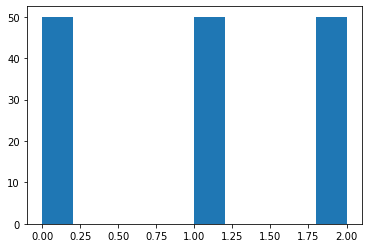

In [10]:
#histogramme pour les tois classes
plt.hist(df['classe'])

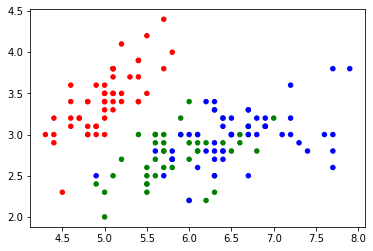

In [11]:
colormap=np.array(["red", "green", "blue"])
plt.scatter(df[0] , df[1], c=colormap[df['classe']], s=20)
plt.show()


In [12]:
#supprimer la colonne 4
df=df.drop(columns='classe')
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Kmeans

L'objectif de l'algorithme des k-moyennes (k-means) est de découper notre dataset en k paquets qui se ressemblent. Le résultat du regroupement pourra définir une étiquette associée à chaque élément du dataset. C'est en ça que cette technique est classée dans l'apprentissage non supervisé, par opposition aux techniques où le libellé est fourni au modèle en même temps que les données.

Étapes de l'algorithme :

* positionnement des k centroïdes ;
pour chaque itération

* associer chaque point du dataset au centroïde le plus proche,
déplacer les k centroïdes vers les barycentres des points dont ils sont les plus proches.
* L'algorithme s'arrête lorsqu'on a atteint le nombre maximum d'itérations ou lorsque les centroïdes ne bougent plus.
 # Remarques 
* L'algorithme du k-means est un algorithme très utilisé en clustering.

* Il fonctionne généralement bien, il est rapide et relativement simple à comprendre.

* Il est non déterministe, c'est-à-dire que les clusters obtenus peuvent changer légèrement si on relance l'algorithme plusieurs fois.

* Il a toutefois besoin qu'on lui spécifie le nombre de clusters à produire.

* Pour choisir le nombre de clusters, on applique la méthode du "coude", et on cherche une "cassure" dans la courbe liant la variance intraclasse au nombre de clusters.



# K-means


In [13]:
from sklearn.cluster import KMeans


Selon l’algorithme de K-Means, on doit définir au préalable le nombre K de clusters. 
Appliquer la méthode k-means sur le jeu de donnée Iris pour K=4 et visualiser le résultat de clustring concernant les deux premières caratéristiques

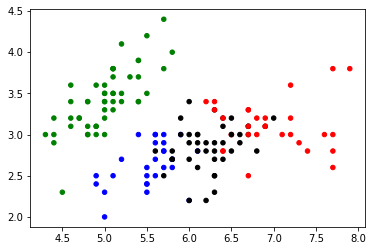

In [14]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(df)
#Visualisation
colormap=np.array(["red", "green", "blue", "black"])
plt.scatter(df[0], df[1], c=colormap[kmeans.labels_], s=20)
plt.show()



Le problème qui se pose et de trouver un K optimal. L’une des méthodes les plus populaires pour y arriver est la méthode d’Elbow.

L’idée est d’exécuter le clustering k-means pour une gamme de clusters k (disons de 1 à 10) et pour chaque valeur, nous calculons l’inertie intraclasse.

Lorsque l’on trace les distorsions et que le tracé ressemble à un bras, le « coude » (le point d’inflexion de la courbe) est la meilleure valeur de k.



Pour $K\in \{1,...,10\}$, appliquer le clustring k-means. On demande de présenter les valeurs d'inertie intraclasse en fonction de K. 

C:\Users\ahlem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


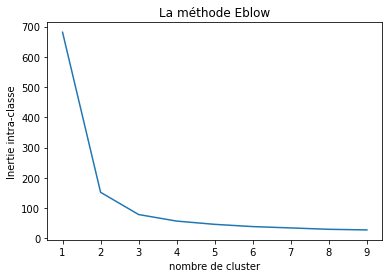

In [15]:
tab=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(df)
    tab.append(kmeans.inertia_)
plt.plot(range(1,10),tab)
plt.title("La méthode Eblow")
plt.xlabel("nombre de cluster")
plt.ylabel("Inertie intra-classe")
plt.show()


Nous remarquons sur ce graphique une courbe ayant la forme d’un bras. Selon la méthode d’Elbow, la valeur optimale de K est ?.  Ce qui concorde avec l’ensemble de données utilisé divisé en ? classes.
-> la valeur optimale de K est 3 ce qui concorde avec l'ensemble de données utilisé divisé en 3 classes.


Application de l’algorithme de K Means
implémenter l’algorithme de K-Means avec les codes ci-dessous :


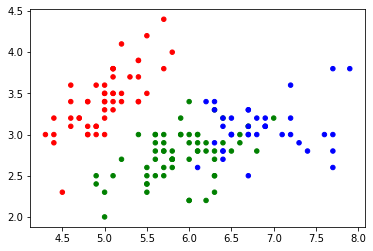

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

#Visualisation
colormap=np.array(["red", "green", "blue"])
plt.scatter(df[0], df[1], c=colormap[kmeans.labels_], s=20)
plt.show()


In [18]:
y_true = dy.values.ravel()

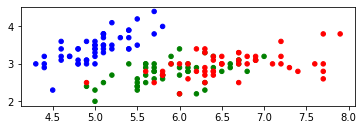

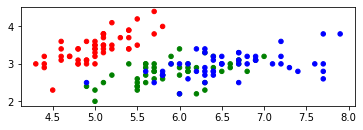

In [19]:
plt.subplot(2,1,1)
colormap=np.array(["red", "green", "blue"])
plt.scatter(df[0], df[1], c=colormap[kmeans.labels_], s=20)
plt.show()
plt.subplot(2,1,2)
plt.scatter(df[0], df[1], c=colormap[y_true], s=20)
plt.show()

# Codage de la méthode kmeans

# Initialisation
On commence par choisir, au hasard, k=3 centroïdes. Qui seront les centres des clusters de départ.


In [20]:
X=df.reset_index().values#df.to_numpy() #convertir df en np.array 

In [21]:
# Initialisation
#n nb d'exemples
n=150
I=np.random.choice(n,3)
centroide=[X[j,:] for j in I] #extraire les exemples j  pour j dans I


In [22]:
print(I)

[43 38 40]


In [23]:
print(centroide)

[array([43. ,  5. ,  3.5,  1.6,  0.6]), array([38. ,  4.4,  3. ,  1.3,  0.2]), array([40. ,  5. ,  3.5,  1.3,  0.3])]


On construit k=3 clusters : Chaque point est dans le cluster du centroïde qui lui est le plus proche.

La sortie un vecteur y de classes attribuée  pour chaque instance

In [24]:
def ppr(X,centroide):
    y=[] #pour les classes
    n=150
    for i in range(n):
        j=np.argmin([np.linalg.norm(X[i,:]-z) for z in centroide] )
        y.append(j)
    return np.array(y)  

Tester cette dernière fonction

In [25]:
Y=ppr(X,centroide)
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


On calcule les nouveaux centroïdes : Pour chacun des clusters qu’on vient de former, on calcule le barycentre qui est la moyenne. Celle-ci devient le nouveau centroïde (n’est pas nécessairement un point du jeu de donnée).


In [26]:
def barycentre(classe):
    G=sum(classe)/len(classe)
    return(G)


Calculer le nouveau centroide pour la classe 0

In [27]:
barycentre(X[Y == 0,:])

array([95.5       ,  6.16203704,  2.91388889,  4.65462963,  1.57314815])

In [28]:
print(Y == 0)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


On recommence jusqu’à ce qu’à ce qu’il y ait convergence : La convergence correspond au fait que les centroïdes ne changent pas après une mise à jour.


In [29]:
y=ppr(X,centroide)
centroide0=centroide.copy()
Y = np.array(y)
centroide=[barycentre(X[Y ==0,:]), barycentre(X[Y == 1,:]),barycentre(X[Y == 2,:])]
k=0
while  k<=500:
   y=ppr(X,centroide)
   centroide0=centroide.copy()
   
   centroide=[barycentre(X[Y ==0,:]), barycentre(X[Y == 1,:]),barycentre(X[Y ==2,:])]
   k=k+1                                    
                                             
                                             
                                             

Affichage de resultat de clustring 

In [30]:
y_true=dy.values.ravel()

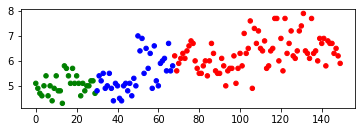

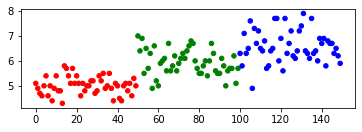

In [31]:
plt.subplot(2,1,1)
colormap=np.array(["red", "green", "blue"])

plt.scatter(X[:,0], X[:,1], c=colormap[y], s=20)
plt.show()
plt.subplot(2,1,2)
plt.scatter(X[:,0], X[:,1], c=colormap[y_true], s=20)
